I generate N measurements of the position of a star (I consider homoscedastic errors). The underlying process is Gaussian, the true position is $\mu = 1$ and the erorrs are $\sigma = 0.2$.
The aim of part 1 is to plot the individual likelihoods, compute their product and find the MLE estimator for the mean.
The aim of part 2 is to compute the error of the estimator using the Fisher information matrix.

Then I generate N measurements of the position of a star considering heteroscedasticity: the errors are generated by a gaussian with mean 0.2 and standard deviation 0.05.
The aim of part 3 is to obtain the estimator and its error for this case.

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import os
import scipy

# Part 1

In [2]:
mu = 1
sigma = 0.2
N = 10   # I notice that if N increases, the standard error of the mean decreases, as I expected
dataset = np.random.normal(mu, sigma, N)
print(dataset)

[1.09527495 0.76287348 0.76189674 0.9320783  1.51664779 0.94273645
 0.89142898 1.08440978 1.15184213 1.08339271]


(10, 1000)


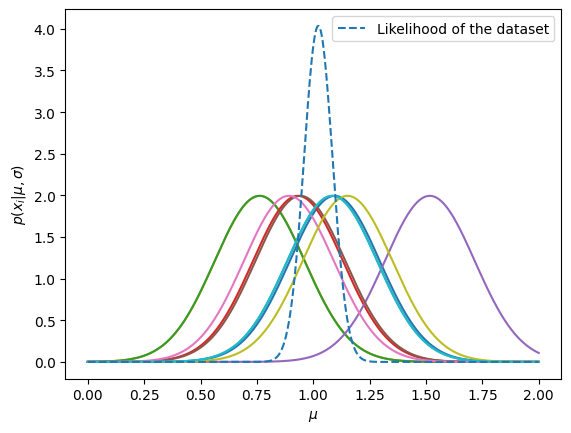

In [3]:
xgrid = np.linspace(0, 2, 1000)

pdf = []
# Probability of the datapoint given the parameter -> likelihood of the single measurement
for i in range (len(dataset)):
    pdf.append(scipy.stats.norm.pdf(xgrid, loc=dataset[i], scale=sigma))
    plt.plot(xgrid, pdf[i])  # I plot each of the likelihoods separately

pdf_array = np.array(pdf)
print(pdf_array.shape)
# product
likelihood = np.prod(pdf, axis=0)
plt.plot(xgrid, likelihood, '--', label='Likelihood of the dataset')  # I plot the product of the likelihoods
plt.xlabel('$\mu$')
plt.ylabel('$p(x_i|\mu,\sigma)$')
plt.legend()

In [4]:
# I find the maximum likelihood solution and I compare it with the MLE estimator (the sample arithmetic mean)
max_likelihood = np.max(likelihood)
max_likelihood_index = np.argsort(likelihood)[len(likelihood)-1]
max_likelihood_solution = xgrid[max_likelihood_index]

print('The likelihood is maximized at', max_likelihood_solution)   #max_likelihood
print('The arithmetic mean is', np.mean(dataset))                  #mean

The likelihood is maximized at 1.023023023023023
The arithmetic mean is 1.0222581309500631


# Part 2

In [5]:
ln_likelihood = np.log(likelihood)

#I compute the element of the Fisher information matrix that defines the uncertainty on the mean
diff = np.diff(ln_likelihood, n=2)         # second order differentiation
diff_norm = -diff/(xgrid[1]-xgrid[0])**2   # I divide by delta_mu **2 to have the correct normalization
print('The element of the Fisher infomation matrix is', diff_norm[max_likelihood_index])

Fisher_error = diff_norm[max_likelihood_index]**(-1/2)
print('The Fisher matrix error estimate is', Fisher_error)

# Theoretical value
sigma_mean = sigma/np.sqrt(N)
print('The standard error of the mean is', sigma_mean)

The element of the Fisher infomation matrix is 250.00000000005195
The Fisher matrix error estimate is 0.06324555320336102
The standard error of the mean is 0.06324555320336758


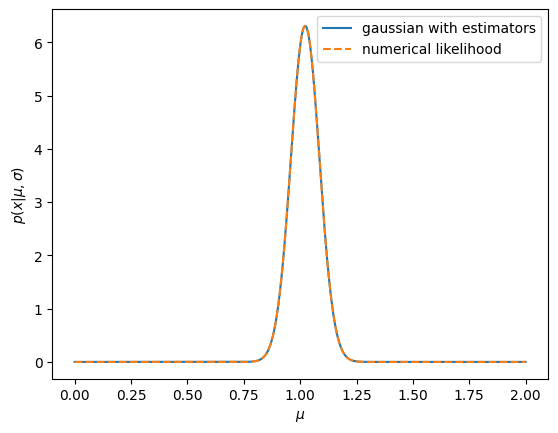

In [6]:
# I compare the numerical likelihood distribution with a gaussian described by the MLestimators
gaussian = scipy.stats.norm.pdf(xgrid, loc=np.mean(dataset), scale=sigma_mean)

#scaling
k = np.max(gaussian)/np.max(likelihood)
scaled_likelihood = k * likelihood

plt.plot(xgrid, gaussian, label='gaussian with estimators')
plt.plot(xgrid, scaled_likelihood, '--' , label='numerical likelihood')
plt.xlabel('$\mu$')
plt.ylabel('$p(x|\mu,\sigma)$')
plt.legend()

# Part 3

(5, 1000)


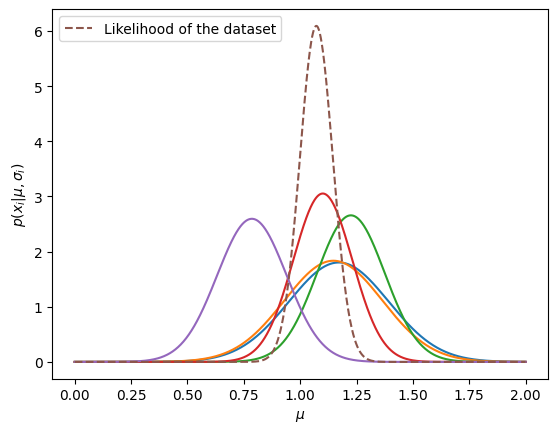

In [7]:
# I perform the same passages as before, but now each likelihood has a different sigma
mu = 1
N = 5
sigma = np.random.normal(0.2, 0.05, N)
dataset = np.random.normal(mu, sigma, N)

xgrid = np.linspace(0, 2, 1000)

pdf = []
for i in range (len(dataset)):
    pdf.append(scipy.stats.norm.pdf(xgrid, loc=dataset[i], scale=sigma[i]))
    plt.plot(xgrid, pdf[i])   # I plot the individual likelihoods

pdf_array = np.array(pdf)
print(pdf_array.shape)
likelihood = np.prod(pdf, axis=0)
plt.plot(xgrid, likelihood, '--', label='Likelihood of the dataset')  # I plot the product of the likelihoods
plt.xlabel('$\mu$')
plt.ylabel('$p(x_i|\mu,\sigma_i)$')
plt.legend()

In [8]:
#mean
max_likelihood = np.max(likelihood)
max_likelihood_index = np.argsort(likelihood)[len(likelihood)-1]

print('Mean')
print('The likelihood is maximized at', xgrid[max_likelihood_index])              #max_likelihood
print('The estimator of the mean is', np.average(dataset, weights=1/sigma**2))    #mean (take different errors into account!)

#sigma
print('-----------------------------')
print('Sigma')
#I compute the element of the Fisher information matrix that defines the uncertainty on the mean
ln_likelihood = np.log(likelihood)
diff = np.diff(ln_likelihood, n=2)
diff_norm = -diff/(xgrid[1]-xgrid[0])**2
Fisher_error = diff_norm[max_likelihood_index]**(-1/2)
print('The element of the Fisher infomation matrix is', diff_norm[max_likelihood_index])
print('The Fisher matrix error estimate is', Fisher_error)
# Theoretical value
est_sigma_mean = (np.sum(1/sigma**2))**(-1/2)
print('The uncertainty of the mean is', est_sigma_mean)

Mean
The likelihood is maximized at 1.0710710710710711
The estimator of the mean is 1.071864473314405
-----------------------------
Sigma
The element of the Fisher infomation matrix is 186.85558569248352
The Fisher matrix error estimate is 0.07315549573020656
The uncertainty of the mean is 0.07315549573021388


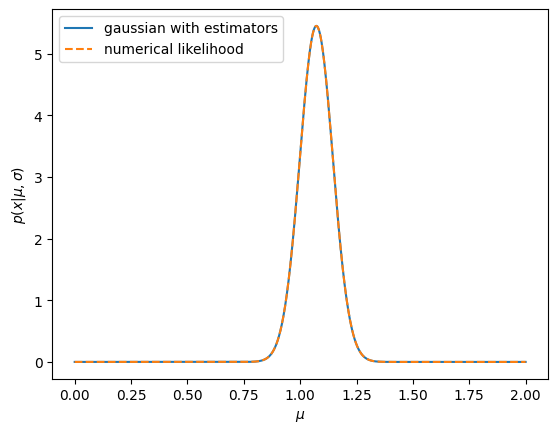

In [9]:
# I compare the numerical likelihood distribution with a gaussian described by the MLestimators
gaussian = scipy.stats.norm.pdf(xgrid, loc=np.average(dataset, weights=1/sigma**2), scale=est_sigma_mean)

#scaling
k = np.max(gaussian)/np.max(likelihood)
scaled_likelihood = k * likelihood

plt.plot(xgrid, gaussian, label='gaussian with estimators')
plt.plot(xgrid, scaled_likelihood, '--' , label='numerical likelihood')
plt.xlabel('$\mu$')
plt.ylabel('$p(x|\mu,\sigma)$')
plt.legend()